<a href="https://colab.research.google.com/github/Gyanprakash136/Machine-learning-mini-projects/blob/main/treeclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv(r"/content/processed.cleveland.data")


In [ ]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


since there is no column name to the dataset , using pandas we will provide the column name

In [ ]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
df.dtypes

,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


from the datatypes we can analyze that ca and thal act as object datatype but when we read it's datatype we the data is based on float datatype so intutively we can say that it have missing values

In [ ]:
  df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

from the question mark we can analyze that we have some missing data of the ca test.

In [ ]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

# from the question marks we confirmed that it have missing values now it's turn for the data  manipulation or data imputation

In [ ]:
len(df.loc[(df['ca'] == '?')
            |
             (df['thal']=='?')])


6

6 rows which have missing values

In [ ]:
df.loc[(df['ca'] == '?')
            |
             (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


so the missing data is 2 % of total data so we can remove the  row that have missing data . if we remove the 2 % of the data then also we have the huge data to train and test.after removal of missing data we will be left with this  302 - 6 = 296 .

In [ ]:
len(df)

302

In [ ]:
df_no_missing = df.loc[(df['ca']!='?')
              &
                (df['thal'] != '?')]


In [ ]:
len(df_no_missing)

296

In [ ]:
df_no_missing['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

In [ ]:
df_no_missing.dtypes

,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
df_no_missing['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

In [ ]:
df_no_missing['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

spliting data into dependent and independent variable

In [ ]:
X = df_no_missing.drop('hd',axis=1).copy()
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [ ]:
y = df_no_missing['hd'].copy()
y

,hd
0,2
1,1
2,0
3,0
4,0
...,...
296,1
297,1
298,2
299,3


step 5: one hot encoding

In [ ]:
X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,False,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
y_not_zero_index = y>0
y[y_not_zero_index] = 1
y.unique()

array([1, 0])

now building a preliminary classification tree

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state = 42)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train,y_train)

[Text(0.5194444444444445, 0.9444444444444444, 'cp_4.0 <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]\nclass = No HD'),
 Text(0.2611111111111111, 0.8333333333333334, 'slope_2.0 <= 0.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]\nclass = No HD'),
 Text(0.39027777777777783, 0.8888888888888888, 'True  '),
 Text(0.14444444444444443, 0.7222222222222222, 'restbp <= 185.0\ngini = 0.198\nsamples = 72\nvalue = [64, 8]\nclass = No HD'),
 Text(0.12222222222222222, 0.6111111111111112, 'age <= 56.5\ngini = 0.178\nsamples = 71\nvalue = [64.0, 7.0]\nclass = No HD'),
 Text(0.044444444444444446, 0.5, 'slope_3.0 <= 0.5\ngini = 0.043\nsamples = 45\nvalue = [44, 1]\nclass = No HD'),
 Text(0.022222222222222223, 0.3888888888888889, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = No HD'),
 Text(0.06666666666666667, 0.3888888888888889, 'thal_3.0 <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No HD'),
 Text(0.044444444444444446, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0

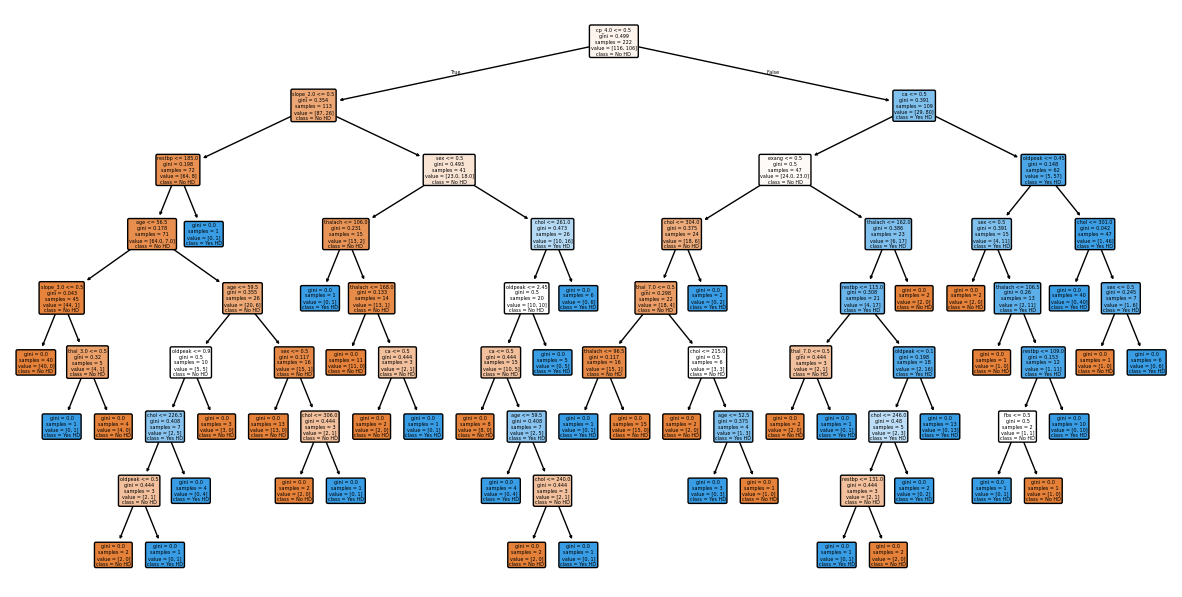

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names = X_encoded.columns)

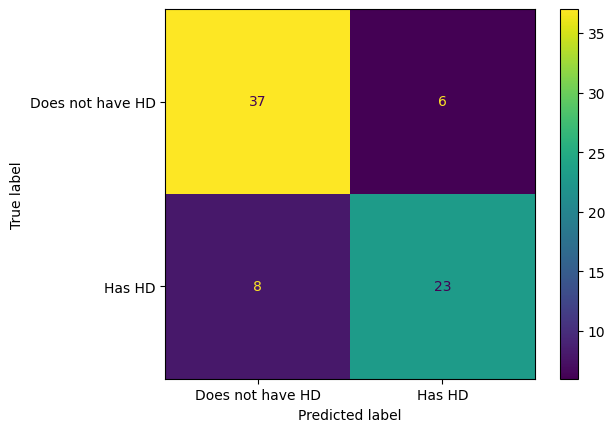

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt,X_test,y_test,display_labels=["Does not have HD","Has HD"])


in the confusion matrix we can see that 37+6 = 42 (14%people does not have heart disease but predicted they heart diesease)people does not have heart disease , 23+8 = 31 people does have heart diesease () 25  percent of the prediction is wrong for the person who really  have heart disease

Preventing overfitting by cost complexity pruning: visulize alpha

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train) # determine the different values for alpha
ccp_alphas = path.ccp_alphas # extract different values of alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha
clf_dts = [] # creating a list that will store the decision tree
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0,ccp_alpha = ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)

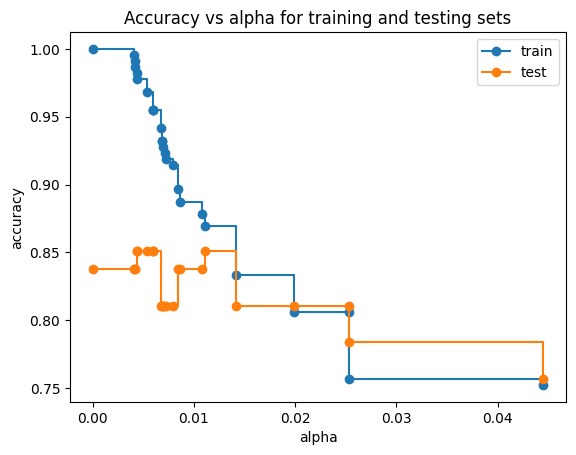

In [ ]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores,marker= 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()

considering alpha = 0.016

<Axes: xlabel='tree'>

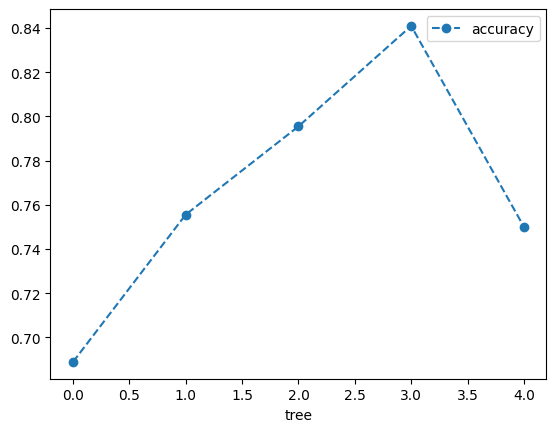

In [ ]:
clf_dt = DecisionTreeClassifier(random_state = 42,ccp_alpha = 0.016)

# now we will use the k fold cross validation test k = 5

scores = cross_val_score(clf_dt,X_train,y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5),'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o',linestyle='--')


<Axes: xlabel='alpha'>

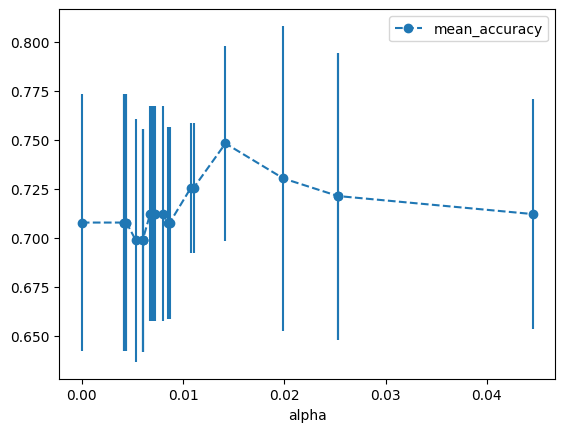

In [ ]:
alpha_loop_values = [] # creating an array to store the results of each folds

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 42,ccp_alpha = ccp_alpha)
  scores = cross_val_score(clf_dt,X_train,y_train, cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
alpha_results = pd.DataFrame(alpha_loop_values,columns =['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [ ]:
alpha_results[(alpha_results['alpha']>0.014)
                &
                 (alpha_results['alpha']<0.016)]

,alpha,mean_accuracy,std
21,0.01419,0.748182,0.049741


In [ ]:
# converting ideal ccp alpha series to a float
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) &(alpha_results['alpha']<0.016 )]['alpha']
ideal_ccp_alpha

,alpha
21,0.01419


In [ ]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014190014190014191

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.014190014190014191, random_state=42)

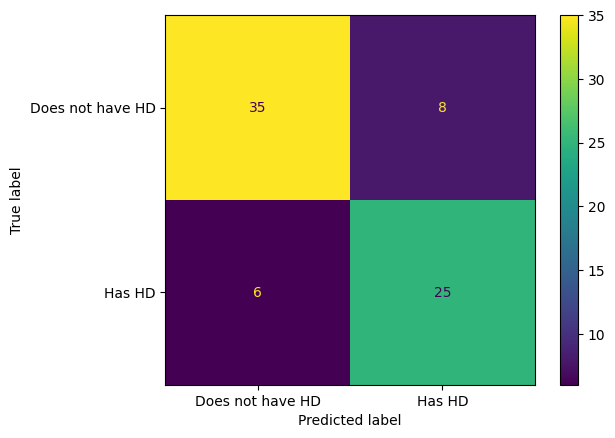

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,X_test,y_test,display_labels=["Does not have HD","Has HD"])

[Text(0.5, 0.875, 'cp_4.0 <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]\nclass = No HD'),
 Text(0.2, 0.625, 'slope_2.0 <= 0.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]\nclass = No HD'),
 Text(0.35, 0.75, 'True  '),
 Text(0.1, 0.375, 'gini = 0.198\nsamples = 72\nvalue = [64, 8]\nclass = No HD'),
 Text(0.3, 0.375, 'sex <= 0.5\ngini = 0.493\nsamples = 41\nvalue = [23.0, 18.0]\nclass = No HD'),
 Text(0.2, 0.125, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = No HD'),
 Text(0.4, 0.125, 'gini = 0.473\nsamples = 26\nvalue = [10, 16]\nclass = Yes HD'),
 Text(0.8, 0.625, 'ca <= 0.5\ngini = 0.391\nsamples = 109\nvalue = [29, 80]\nclass = Yes HD'),
 Text(0.65, 0.75, '  False'),
 Text(0.7, 0.375, 'exang <= 0.5\ngini = 0.5\nsamples = 47\nvalue = [24.0, 23.0]\nclass = No HD'),
 Text(0.6, 0.125, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = No HD'),
 Text(0.8, 0.125, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = Yes HD'),
 Text(0.9, 0.375, 'gini = 0.148\nsamples 

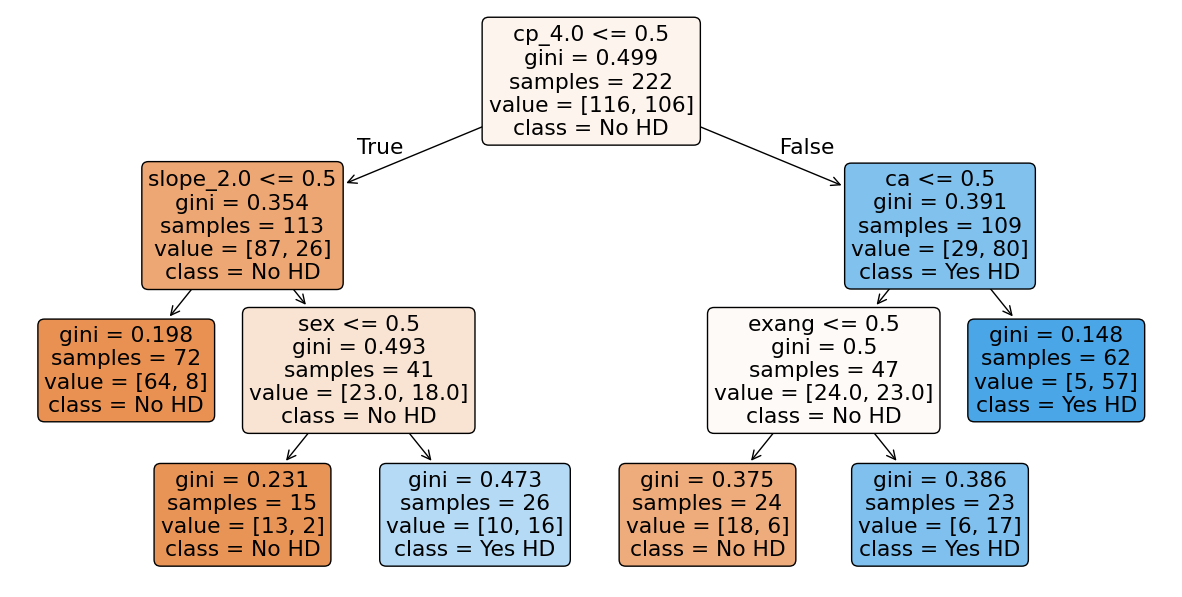

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names = X_encoded.columns)